In [17]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from torch import nn
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import load_config
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [18]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [19]:
config_folder = "config/"
config = load_config(config_folder)

training metric file outputs\re\BioBERT_fc2020-12-01 01_45_07_246692_train_metrics_.pkl
[[0, 4836151.670711033, 0.9156333333333333], [1, 2551344.3730085758, 0.9774333333333334], [2, 2201440.2887230744, 0.9811], [3, 1773129.493867345, 0.9837666666666667], [4, 1581543.1152202473, 0.9852], [5, 1381072.8289937074, 0.987], [6, 1341885.3019118938, 0.9871], [7, 1143260.1741254262, 0.9879], [8, 1076533.1186880548, 0.9887], [9, 1017559.9262479573, 0.989]]

 
 

training metric file outputs\re\BioBERT_fc2020-12-01 05_11_03_354130_train_metrics_.pkl
[[0, 10742703.793125704, 1.9427666666666668], [1, 5973835.955891993, 2.0098], [2, 4157639.842399466, 2.0157], [3, 3164121.973084242, 2.019633333333333], [4, 2472643.5732291527, 2.0223333333333335], [5, 2195651.7551847883, 2.0240666666666667], [6, 2179336.4686238808, 2.024], [7, 2057093.1738016636, 2.0239], [8, 2204606.428556581, 2.0239], [9, 2325090.2728900937, 2.0240666666666667]]

 
 

training metric file outputs\re\BioBERT_fc2020-12-01 09_23_56_82

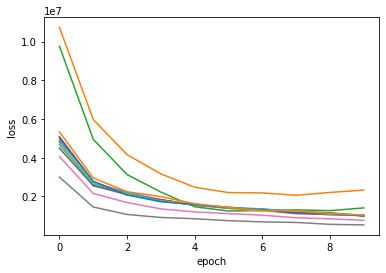

In [20]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
for metrics_file in list_train_metrics:
    print('training metric file', metrics_file)
    with open(metrics_file,"rb") as f:
        train_metric = pickle.load(f)
        print(train_metric)

    print("\n \n \n")

    plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])
    plt.xlabel("epoch")
    plt.ylabel("loss")
